<a href="https://colab.research.google.com/github/shahad-jeza/KFUPM_project/blob/main/FDI_in_UAV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1- Data prepreation

**upload the data files from google drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**move the data to colab and unzip it**

In [2]:
import shutil
import os

# Path to the folder containing zip files in Google Drive
folder_path = '/content/drive/My Drive/KFUPM_data/'

# Destination path in Colab's content directory
dest_path = '/content/KFUPM_data/'

# Create the destination folder if it doesn't exist
os.makedirs(dest_path, exist_ok=True)

# List all files in the folder
files = os.listdir(folder_path)

# Iterate through each file in the folder
for file in files:
    if file.endswith('.zip'):
        # Path to the zip file in Google Drive
        zip_file_path = os.path.join(folder_path, file)

        # Copy the zip file from Google Drive to Colab
        shutil.copy(zip_file_path, dest_path)

        # Unzip the file (if needed)
        shutil.unpack_archive(os.path.join(dest_path, file), dest_path)



*  **for each folder take csv files only and combine them**
*  **also add a column for the label as the folder name**



In [3]:
import os
import pandas as pd

# Function to combine CSV files in a folder
def combine_csv_in_folder(folder_path):
    # Initialize an empty list to hold all dataframes
    all_data = []

    # Get the folder name from the folder path
    folder_name = os.path.basename(folder_path)

    # Iterate through all files in the folder
    for file_name in os.listdir(folder_path):
        # Check if the file is a CSV file
        if file_name.endswith('.csv'):
            file_path = os.path.join(folder_path, file_name)
            # Read the CSV file into a pandas DataFrame
            df = pd.read_csv(file_path)
            # Add a 'label' column with the folder name
            df['label'] = folder_name
            # Append the DataFrame to the list
            all_data.append(df)

    # Check if any CSV files were found
    if len(all_data) == 0:
        print(f"No CSV files found in {folder_path}")
        return None

    # Combine all DataFrames into one
    combined_df = pd.concat(all_data, ignore_index=True)

    return combined_df

# Base path where folders are located
base_path = '/content/KFUPM_data/'

# Get a list of all folders inside base_path
folders_to_process = [os.path.join(base_path, folder) for folder in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, folder))]

# Initialize an empty list to hold all combined DataFrames
all_combined_data = []

# Process each folder and combine CSV files
for folder_path in folders_to_process:
    combined_data = combine_csv_in_folder(folder_path)
    if combined_data is not None:
        all_combined_data.append(combined_data)

# Check if any data was combined
if len(all_combined_data) > 0:
    # Concatenate all combined DataFrames into one
    final_combined_df = pd.concat(all_combined_data, ignore_index=True)
    final_combined_df.head()
else:
    print("No data was combined. Please check your folder paths and contents.")


No CSV files found in /content/KFUPM_data/__MACOSX


In [4]:
final_combined_df.head()

,timestamp,motor.m1,motor.m2,motor.m3,motor.m4,pwm.m1_pwm,pwm.m2_pwm,pwm.m3_pwm,pwm.m4_pwm,pm.vbatMV,...,stateEstimate.z,stateEstimate.vx,stateEstimate.vy,stateEstimate.vz,stateEstimate.ax,stateEstimate.ay,stateEstimate.az,stateEstimate.roll,stateEstimate.yaw,label
0,0.000,0,0,0,0,0,0,0,0,3652,...,0.000026,-0.000757,-0.000230,0.001595,-0.002243,0.001268,-0.001444,-0.322903,-13.865106,cut_M2_0.5мм_46.5мм
1,9.897,0,0,0,0,0,0,0,0,3652,...,0.000052,-0.001207,0.000003,0.001471,-0.001635,0.000097,0.001919,-0.321898,-13.854039,cut_M2_0.5мм_46.5мм
2,19.816,0,0,0,0,0,0,0,0,3652,...,-0.000025,-0.000925,0.000260,0.000808,-0.000242,-0.001727,-0.000265,-0.324244,-13.863913,cut_M2_0.5мм_46.5мм
3,29.719,0,0,0,0,0,0,0,0,3652,...,0.000022,-0.000911,0.000245,0.001079,-0.001602,0.000487,-0.000799,-0.323486,-13.857047,cut_M2_0.5мм_46.5мм
4,39.641,0,0,0,0,0,0,0,0,3652,...,-0.000031,-0.000699,0.000521,0.000631,-0.001367,0.000340,-0.001369,-0.323486,-13.857047,cut_M2_0.5мм_46.5мм


**shuffle the data**

In [5]:
final_combined_df = final_combined_df.sample(frac=1).reset_index(drop=True)

In [6]:
final_combined_df.head()

,timestamp,motor.m1,motor.m2,motor.m3,motor.m4,pwm.m1_pwm,pwm.m2_pwm,pwm.m3_pwm,pwm.m4_pwm,pm.vbatMV,...,stateEstimate.z,stateEstimate.vx,stateEstimate.vy,stateEstimate.vz,stateEstimate.ax,stateEstimate.ay,stateEstimate.az,stateEstimate.roll,stateEstimate.yaw,label
0,13658.858,0,0,0,0,0,0,0,0,3821,...,0.048333,-0.007261,-0.000468,-0.001778,-0.003035,-0.000137,0.000347,-0.123957,-5.681973,normal_flight
1,7839.694,41581,32385,44777,37337,46502,39178,48653,43331,3446,...,0.544988,0.654114,-0.003809,-0.014304,-0.017334,-0.000680,-0.025802,-0.944093,0.886312,normal_flight
2,18514.457,43753,39839,49827,34449,50378,47499,54212,43010,3283,...,0.447737,0.059459,0.008377,0.124497,-0.025107,0.002579,-0.007990,0.229595,4.189409,cut_M2_0.5мм_46.5мм
3,17091.511,40155,44187,49065,33349,44790,47543,50448,39421,3499,...,0.023905,-0.052073,-0.009242,0.029086,-0.057143,0.000466,0.029980,-1.259609,1.447925,normal_flight
4,20121.129,42643,37963,49979,37831,48964,45421,53609,45315,3325,...,0.524585,-0.228026,-0.029023,0.035338,-0.070729,0.014167,0.027744,-1.167618,2.966818,add_weight_W1_near_M3


At this stage the data is labeld with 4 classes and ready for next step



---



# Data Pre-proccessing

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Encode the labels into numerical values
label_encoder = LabelEncoder()
final_combined_df['label'] = label_encoder.fit_transform(final_combined_df['label'])

# Split the data into features and labels
X = final_combined_df.drop(['timestamp', 'label'], axis=1)
y = final_combined_df['label']

# Normalize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



---



# 3- model training

**Support Vector Machine**

In [17]:
# Train the SVM model

svm_model = SVC(kernel='linear')
start_time = time.time()
svm_model.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training Time: {training_time:.4f} seconds")

Training Time: 79.9964 seconds


In [10]:
from sklearn.metrics import classification_report, accuracy_score
import time

# Measure inference time
start_time = time.time()
y_pred = svm_model.predict(X_test)
inference_time = time.time() - start_time
print(f"Inference Time: {inference_time:.4f} seconds")


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Inference Time: 4.7370 seconds
Accuracy: 0.88
                         precision    recall  f1-score   support

  add_weight_W1_near_M3       0.72      0.73      0.73      1553
    cut_M2_0.5мм_46.5мм       0.95      0.78      0.86      1585
          normal_flight       0.96      0.97      0.97      6274
tape_on_propeller_M1_M3       0.69      0.76      0.72      1486

               accuracy                           0.88     10898
              macro avg       0.83      0.81      0.82     10898
           weighted avg       0.89      0.88      0.88     10898





---



**Random Forest Classifier**

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
start_time = time.time()
rf_model.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training Time: {training_time:.4f} seconds")

Training Time: 24.9016 seconds


In [12]:
# Predict on the test set

# Measure inference time
start_time = time.time()
y_pred = rf_model.predict(X_test)
inference_time = time.time() - start_time
print(f"Inference Time: {inference_time:.4f} seconds")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Inference Time: 0.1809 seconds
Accuracy: 0.99
Classification Report:
                         precision    recall  f1-score   support

  add_weight_W1_near_M3       0.99      0.98      0.99      1553
    cut_M2_0.5мм_46.5мм       0.99      1.00      0.99      1585
          normal_flight       1.00      1.00      1.00      6274
tape_on_propeller_M1_M3       0.99      0.98      0.99      1486

               accuracy                           0.99     10898
              macro avg       0.99      0.99      0.99     10898
           weighted avg       0.99      0.99      0.99     10898



**Features importance**

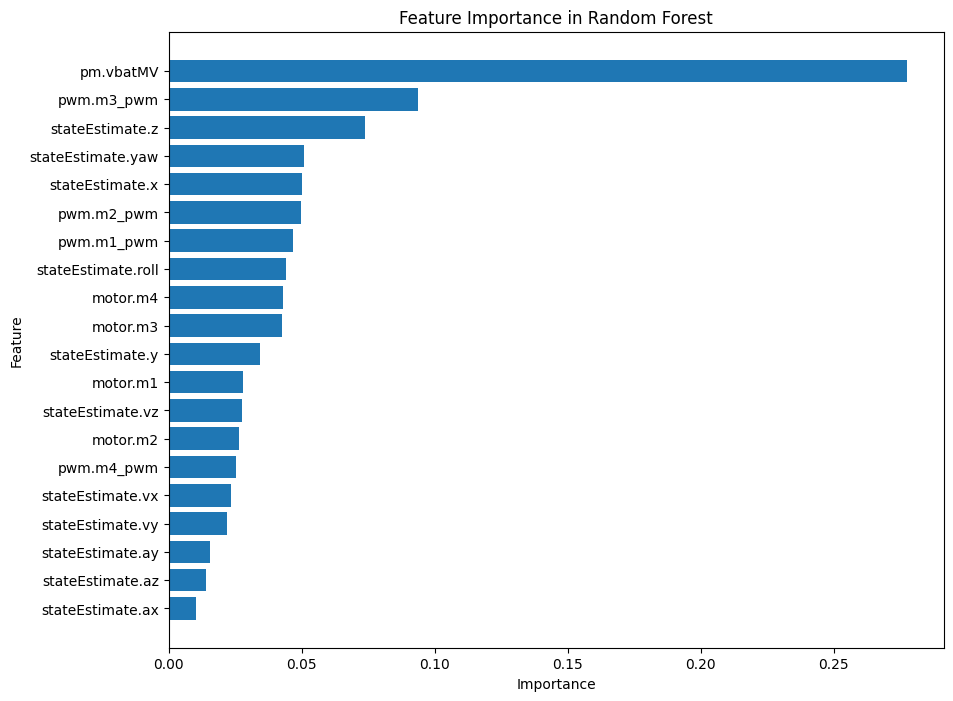

In [13]:
import matplotlib.pyplot as plt

# Get feature importance from the Random Forest model
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()
plt.show()




---



**Gradient boosting**

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

gb_model = GradientBoostingClassifier(random_state=42)

start_time = time.time()
gb_model.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training Time: {training_time:.4f} seconds")

start_time = time.time()
y_pred = gb_model.predict(X_test)
inference_time = time.time() - start_time
print(f"Inference Time: {inference_time:.4f} seconds")

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Training Time: 178.5083 seconds
Inference Time: 0.0785 seconds
Accuracy: 0.97
Confusion Matrix:
[[1427   17   53   56]
 [  17 1542    3   23]
 [  34    3 6224   13]
 [  82   24   22 1358]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      1553
           1       0.97      0.97      0.97      1585
           2       0.99      0.99      0.99      6274
           3       0.94      0.91      0.93      1486

    accuracy                           0.97     10898
   macro avg       0.95      0.95      0.95     10898
weighted avg       0.97      0.97      0.97     10898





---



**Naive Bias**

In [16]:
from sklearn.naive_bayes import GaussianNB


nb_model = GaussianNB()

start_time = time.time()
nb_model.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training Time: {training_time:.4f} seconds")

start_time = time.time()
y_pred = nb_model.predict(X_test)
inference_time = time.time() - start_time
print(f"Inference Time: {inference_time:.4f} seconds")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Training Time: 0.0424 seconds
Inference Time: 0.0088 seconds
Accuracy: 0.42
Confusion Matrix:
[[  67  815  543  128]
 [  38  873  519  155]
 [ 222 2241 3252  559]
 [  31  682  436  337]]
Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.04      0.07      1553
           1       0.19      0.55      0.28      1585
           2       0.68      0.52      0.59      6274
           3       0.29      0.23      0.25      1486

    accuracy                           0.42     10898
   macro avg       0.34      0.33      0.30     10898
weighted avg       0.49      0.42      0.43     10898





---



**Logistic regression**

['add_weight_W1_near_M3' 'cut_M2_0.5мм_46.5мм' 'normal_flight'
 'tape_on_propeller_M1_M3']
(43590, 20) (10898, 20) (43590,) (10898,)
label
2    0.571370
1    0.143106
0    0.142831
3    0.142693
Name: proportion, dtype: float64
label
2    0.571297
1    0.143146
0    0.142870
3    0.142687
Name: proportion, dtype: float64
Training Time: 1.4580 seconds
Inference Time: 0.0060 seconds
Model accuracy: 0.87


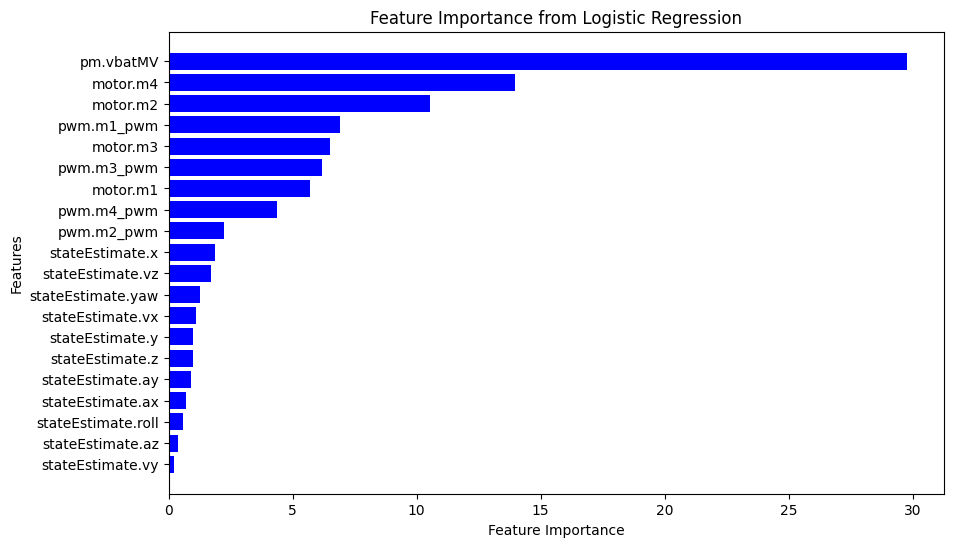

Classification Report:
                         precision    recall  f1-score   support

  add_weight_W1_near_M3       0.75      0.70      0.72      1557
    cut_M2_0.5мм_46.5мм       0.80      0.81      0.80      1560
          normal_flight       0.96      0.98      0.97      6226
tape_on_propeller_M1_M3       0.68      0.64      0.66      1555

               accuracy                           0.87     10898
              macro avg       0.79      0.78      0.79     10898
           weighted avg       0.86      0.87      0.87     10898



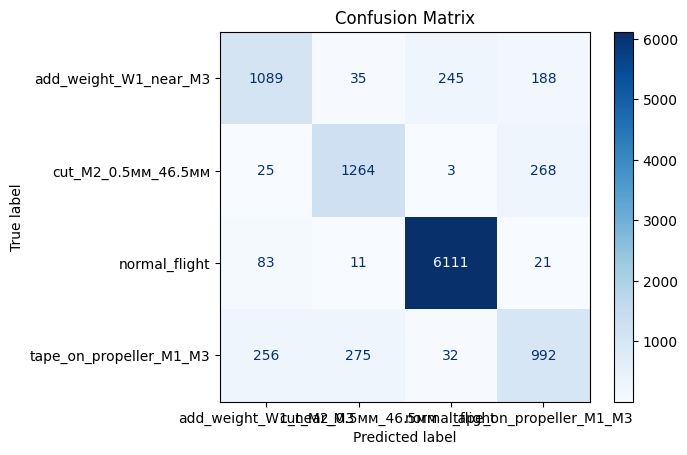

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')


UAV_data_path = '/content/drive/MyDrive/classes_csv_files/all_classes_combined_shuffled.csv'
UAV_data_df= pd.read_csv(UAV_data_path)
label2id = {'normal_flight': 0, 'cut_M2_0.5мм_46.5мм': 1, 'add_weight_W1_near_M3': 2, 'tape_on_propeller_M1_M3': 3}
id2label = {v: k for k, v in label2id.items()}
UAV_data_df.head()


# Encode the labels into numerical values
label_encoder = LabelEncoder()
UAV_data_df['label'] = label_encoder.fit_transform(UAV_data_df['label'])

# Split the data into features and labels
X = UAV_data_df.drop(['timestamp', 'label'], axis=1)
y = UAV_data_df['label']

id2label = label_encoder.classes_
print(id2label)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import time

# Assuming X_train_scaled, X_test_scaled, y_train, y_test are already defined
# Assuming feature_names is a list of feature names


clf = LogisticRegression(random_state=0, multi_class='multinomial', solver='lbfgs')
# Measure inference time
start_time = time.time()
clf=clf.fit(X_train_scaled, y_train)
train_time = time.time() - start_time
print(f"Training Time: {train_time:.4f} seconds")


from sklearn.metrics import classification_report, accuracy_score

# Measure inference time
start_time = time.time()
y_pred = clf.predict(X_test)
inference_time = time.time() - start_time
print(f"Inference Time: {inference_time:.4f} seconds")


import matplotlib.pyplot as plt
import pandas as pd


# Print the score of the model
score = clf.score(X_test_scaled, y_test)
print(f'Model accuracy: {score:.2f}')

# Feature importance (coefficients)
# For multi-class, clf.coef_ will be an array of shape (n_classes, n_features)
# We will sum the absolute values of the coefficients across all classes
feature_importance = abs(clf.coef_).sum(axis=0)
feature_names = X.columns if isinstance(X, pd.DataFrame) else [f'Feature {i}' for i in range(len(feature_importance))]


# Check if feature_names matches the length of feature_importance
if len(feature_names) != len(feature_importance):
    raise ValueError("Length of feature_names does not match number of features in the model")

# Feature importance as a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='b')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Logistic Regression')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

# Predictions and classification report
y_pred = clf.predict(X_test_scaled)
class_names = label_encoder.classes_
report = classification_report(y_test, y_pred, target_names=class_names)
print('Classification Report:')
print(report)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Display the DataFrame


#feature_importance_df
# Display the DataFrame
#import ace_tools as tools; tools.display_dataframe_to_user(name="Feature Importance from Logistic Regression", dataframe=feature_importance_df)




---



**K-NN**

In [20]:
# Fitting KNeighborsClassifie to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
start_time = time.time()
classifier.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training Time: {training_time:.4f} seconds")

Training Time: 0.0538 seconds


In [21]:
# Predicting the Test set results
import time
# Measure inference time
start_time = time.time()
y_pred = classifier.predict(X_test)
inference_time = time.time() - start_time
print(f"Inference Time: {inference_time:.4f} seconds")

Inference Time: 5.3519 seconds


In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = accuracy_score(y_test,y_pred)
print("Accuracy:",result)

Accuracy: 0.9433841071756286
